In [19]:
import pandas as pd

In [20]:
data = pd.read_csv("Phishing_Legitimate_Full.csv")

In [21]:
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [22]:
print(data.isnull().sum())

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [23]:
data = data.drop(columns=['id'])


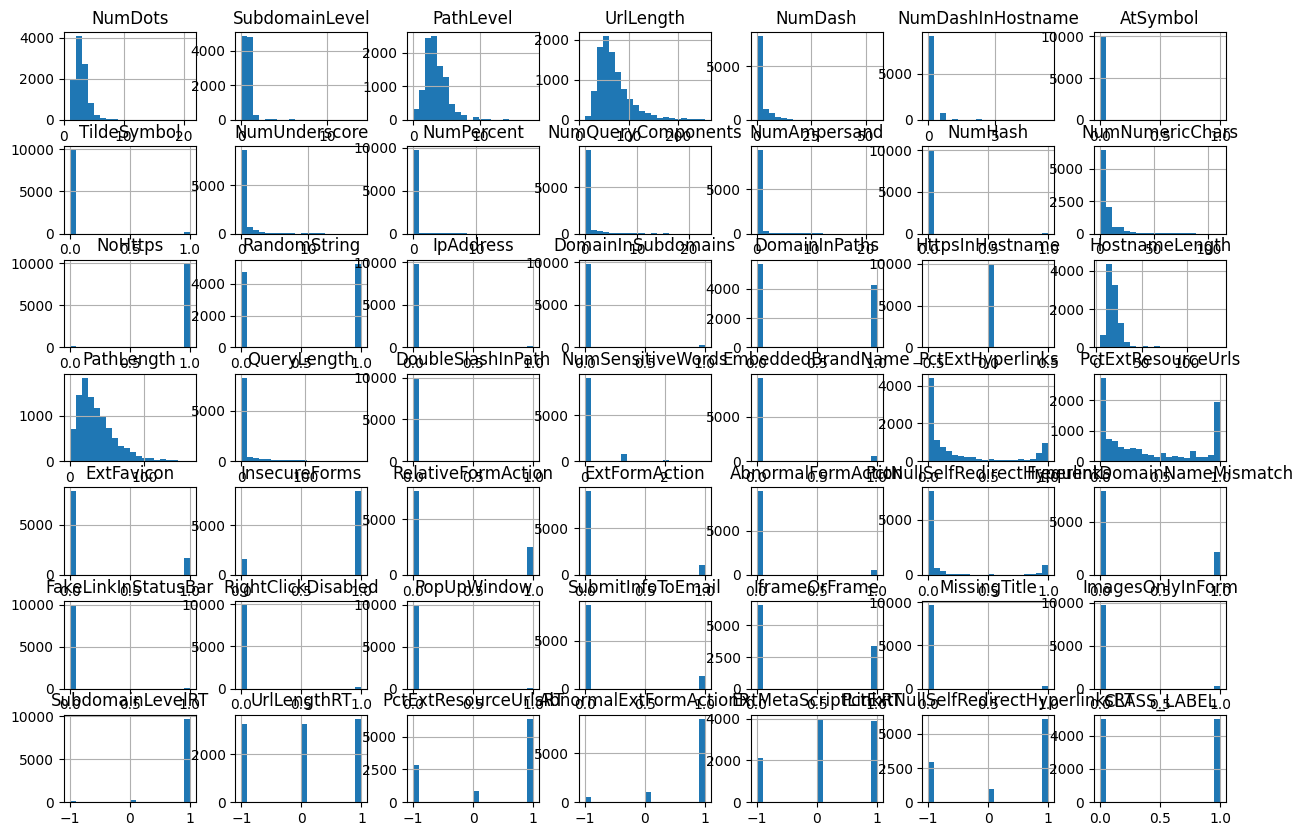

In [24]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(15, 10))
plt.show()


<Axes: >

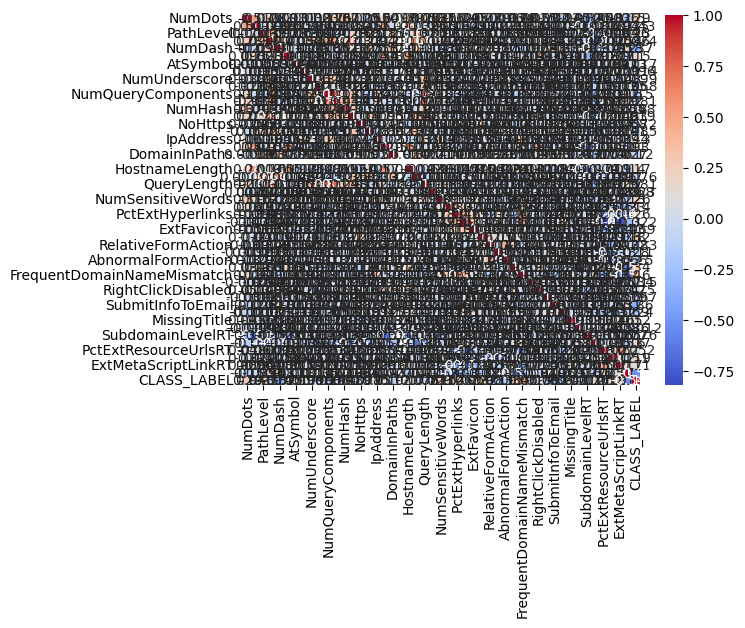

In [25]:
import seaborn as sns

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


In [28]:
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

continuous_features = [
    'UrlLength', 'HostnameLength', 'PctExtResourceUrls',
    'PathLength', 'QueryLength', 'PctExtHyperlinks'
]

scaler = StandardScaler()
data[continuous_features] = scaler.fit_transform(data[continuous_features])

scaler = StandardScaler()
numerical_columns = ['NumDots', 'PathLevel', 'UrlLength', 'NumDash']  # Example
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [29]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['CLASS_LABEL'])  # Features
y = data['CLASS_LABEL']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = data.drop(columns=['CLASS_LABEL'])
y = data['CLASS_LABEL']

model = RandomForestClassifier()
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


PctExtHyperlinks                      0.173280
PctExtNullSelfRedirectHyperlinksRT    0.168926
PctExtResourceUrls                    0.096061
FrequentDomainNameMismatch            0.081157
PctNullSelfRedirectHyperlinks         0.069700
NumDash                               0.044142
ExtMetaScriptLinkRT                   0.039394
InsecureForms                         0.031736
NumNumericChars                       0.031735
PathLevel                             0.029094
SubmitInfoToEmail                     0.024839
NumDots                               0.022722
PathLength                            0.019062
UrlLength                             0.016300
NumSensitiveWords                     0.015976
IframeOrFrame                         0.014266
QueryLength                           0.014252
HostnameLength                        0.012402
ExtFavicon                            0.012090
NumQueryComponents                    0.012012
PctExtResourceUrlsRT                  0.007417
NumUnderscore

In [30]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['CLASS_LABEL'])
y = data['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1463
           1       0.98      0.98      0.98      1537

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Accuracy: 0.9816666666666667


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
import joblib
joblib.dump(model, 'phishing_model.pkl')
